In [1]:
%cd ..

/Users/brewer/Code/UU/CS6390/litbank-entities


# features

In [2]:
import operator
from collections import defaultdict

import numpy as np
import spacy
from matplotlib import pyplot as plt
from spacy.tokens import Doc

from litbank_entities import linguistics, litbank

2023-03-13 21:43:00.246772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
text_sentence_tokens, text_sentence_labels = litbank.get_text_sentence_tokens_labels()
sentence_tokens, sentence_labels = litbank.flatten_texts(text_sentence_tokens, text_sentence_labels)
len(sentence_tokens), len(sentence_labels)

(8562, 8562)

In [4]:
sentence_tokens[0][:8]

['CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']

## Process

In [5]:
v = linguistics.get_vocabulary_counts(sentence_tokens)
sentence_tokens_, sentence_labels_ = linguistics.process(sentence_tokens, sentence_labels)
v_ = linguistics.get_vocabulary_counts(sentence_tokens_)
len(v), len(v_)

(17868, 17785)

## Part of speech

In [6]:
nlp = linguistics.get_nlp()
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler']

In [7]:
pos_counts = linguistics.get_pos_counts(nlp, sentence_tokens_)

In [8]:
len(pos_counts)

17

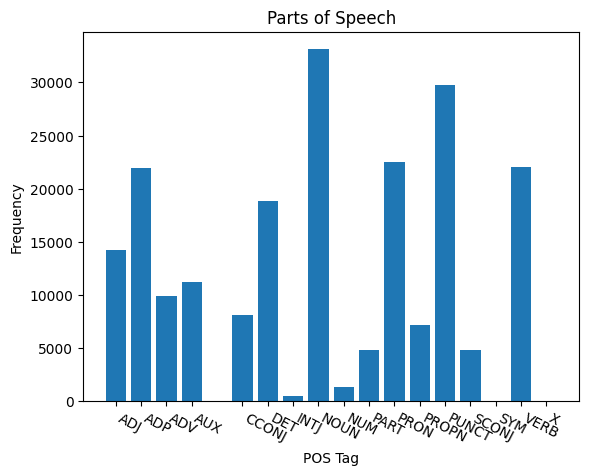

(84, 'ADJ')          14188
(85, 'ADP')          21968
(86, 'ADV')           9917
(87, 'AUX')          11216
(89, 'CCONJ')         8148
(90, 'DET')          18804
(91, 'INTJ')           467
(92, 'NOUN')         33110
(93, 'NUM')           1330
(94, 'PART')          4782
(95, 'PRON')         22516
(96, 'PROPN')         7218
(97, 'PUNCT')        29756
(98, 'SCONJ')         4813
(99, 'SYM')              2
(100, 'VERB')        22031
(101, 'X')              34


In [9]:
pos_pos, pos_y = zip(*pos_counts)
pos_x, pos_names = zip(*pos_pos)
plt.bar(pos_x, pos_y)
plt.title('Parts of Speech')
plt.ylabel('Frequency')
plt.xlabel('POS Tag')
plt.xticks(pos_x, pos_names, ha='left', rotation=-27.5)
plt.show()

for pos, count in pos_counts:
    print('{:<20}{:>6d}'.format(str(pos), count))

## Prefix/Suffix

Find the number of unique characters _after_ processing texts. Namely, numeric digits, diacritics, and alternative quotation marks are gone.

In [10]:
char_counts = linguistics.get_character_counts(sentence_tokens_)
print(len(char_counts))
for i, (char, count) in enumerate(char_counts):
    print(i, char, count)

72
0 e 97528
1 t 68073
2 a 62269
3 o 58362
4 n 53442
5 i 48675
6 h 48483
7 s 47817
8 r 45670
9 d 34367
10 l 31559
11 u 20904
12 m 18739
13 c 18361
14 w 17994
15 f 17601
16 g 15780
17 y 15035
18 , 13752
19 p 12630
20 b 11309
21 . 8086
22 v 7291
23 k 6056
24 I 3693
25 - 3595
26 " 3541
27 ' 2520
28 T 2070
29 H 1431
30 A 1428
31 ; 1402
32 M 1313
33 S 1269
34 x 1140
35 W 914
36 B 832
37 q 766
38 C 738
39 E 686
40 j 589
41 ! 567
42 P 558
43 ? 557
44 O 554
45 N 530
46 L 512
47 R 495
48 D 466
49 G 422
50 z 403
51 F 384
52 Y 366
53 : 356
54 J 327
55 # 314
56 K 139
57 ) 112
58 V 111
59 ( 111
60 U 109
61 * 38
62 Q 29
63 [ 13
64 ] 12
65 Z 11
66 & 6
67 _ 2
68 | 1
69 ` 1
70 X 1
71 $ 1


## Shape

In [11]:
shape_to_count = defaultdict(int)
short_to_count = defaultdict(int)
for tokens in sentence_tokens_:
    for token in tokens:
        shape = linguistics.get_shape(token)
        short = linguistics.get_short(shape)
        shape_to_count[shape] += 1
        short_to_count[short] += 1
shape_counts = sorted(shape_to_count.items(), key=operator.itemgetter(1, 0), reverse=True)
short_counts = sorted(short_to_count.items(), key=operator.itemgetter(1, 0), reverse=True)

print('Shapes: {:d}'.format(len(shape_counts)))
for shape, count in shape_counts[:5] + shape_counts[-5:]:
    print(shape, count)
print('\nShorts: {:d}'.format(len(short_counts)))
for short, count in short_counts[:5] + short_counts[-5:]:
    print(short, count)

Shapes: 299
xxx 39175
xxxx 29144
xx 28436
xxxxx 18362
, 13747
##,###,### 1
##,### 1
###,###,### 1
!!! 1
!! 1

Shorts: 62
x 159932
, 13747
Xx 13404
. 7564
" 3537
X'X 1
'x' 1
'Xx 1
$ 1
#,# 1


In [12]:
[short for short, count in short_counts if count == 1]

['|',
 'x.-X',
 'x-x-x-x-x',
 '`',
 '_',
 "Xx'x",
 'X-x-x-x',
 "X'X",
 "'x'",
 "'Xx",
 '$',
 '#,#']

In [13]:
sentence_labels_[0][:5]

[['O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O'],
 ['B-LOC', 'O', 'O', 'O'],
 ['I-LOC', 'O', 'O', 'O']]

In [14]:
sentence_tokens_[0][:5]

['CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole']

In [15]:
category_sentence_phrases = litbank.get_category_sentence_phrases(sentence_labels_)
type(category_sentence_phrases), type(category_sentence_phrases[0]), type(category_sentence_phrases[0][0])

(list, list, list)

In [16]:
category_sentence_phrases[0][:5]

[[(5, 6, 0), (15, 17, 0), (37, 39, 0), (64, 65, 0)],
 [(50, 56, 0)],
 [(11, 12, 0), (23, 25, 0)],
 [],
 []]

In [17]:
category_sentence_phrases[3][:5]

[[(3, 5, 0), (18, 20, 0)], [], [], [], []]